In [1]:
import io
import os
import sys
import warnings
import numpy as np
import xarray as xr
import pandas as pd
# for calculations and masking regions
import numpy as np
import numpy.ma as ma

# for making figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.path as mpath

# for making maps
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
workingdir = '/Users/dpathak/Desktop/REU/notebooks/'   
dataDir = '/Users/dpathak/Desktop/REU/data/icefracDaily/'
figuredir = '/Users/dpathak/Desktop/REU/figures/Persistence/'
ens = ['001','002','003','004','005','006','007','008','009','010']
   
   
   
#### read data
# make empty dictionaries to hold all ensemble members
icefracDailyCONTROL  = {}
icefracDailyFEEDBACK = {}
icefracDailyFEEDBACKGrouped = {}
icefracDailyCONTROLGrouped = {}
#adding the next two for Septmeber plots
# iceAreaFEEDBACKsept = {}
# iceAreaCONTROLsept = {}
# loop through each file and store in dictionary
for ensNum in range(len(ens)):
    ## ARISE
    ds = xr.open_dataset(dataDir +
                             'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.' + str(ens[ensNum]) +
                             '.cice.h1.aice_d_only.may-october.20350101-20691231_RG_NH.nc')
    # get the correct time stamp since xarray has trouble reading it
    # ds['time'] = pd.date_range(start=pd.to_datetime("2035-01-01"),periods=ds.sizes['time'], freq='MS')
    latIce = ds.lat; lonIce = ds.lon
    time = ds.time
    # print(ds.keys())
    icefracDailyFEEDBACK[ens[ensNum]] =ds.aice_d
    ds.close()
       
    ## SSP
    ds = xr.open_dataset(dataDir +
                             'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.' + str(ens[ensNum]) +
                             '.cice.h1.aice_d_only.may-october.20150101-20691231_RG_NH.nc')
    # ds['time'] = pd.date_range(start=pd.to_datetime("2015-01-01"),periods=ds.sizes['time'], freq='MS')
    # print(ds.time)
    icefracDailyCONTROL[ens[ensNum]] = ds.aice_d
    time = ds.time
    ds.close()

In [2]:
SSPfileprac = np.load('openWaterAnnSSP_N_7.npy')
ARISEfileprac = np.load('openWaterAnnARISE_N_7.npy')

In [3]:
SSP2035 = SSPfileprac[0]
SSP2050 = SSPfileprac[15]
SSP2069 = SSPfileprac[34]
ARISE2035 = ARISEfileprac[0]
ARISE2050 = ARISEfileprac[15]
ARISE2069 = ARISEfileprac[34]
array_no_nans = np.ones(SSP2035.shape)
# a = np.nan_to_num(northpoleSSP2035,300)
print(SSP2035)
# def no_nans_arrays(northpoleSSP2035,array_no_nans):
#     return np.array([northpoleSSP2035[i,x,y] if not np.isnan(northpoleSSP2035[i,x,y]) else array_no_nans[i,x,y] for i in northpoleSSP2035.shape[0]])
# print(no_nans_arrays(northpoleSSP2035,array_no_nans))

[[nan nan nan ... nan  0.  0.]
 [nan nan nan ... nan nan nan]
 [nan nan  0. ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [4]:
datelabels = ['May1', 'Jun1', 'Jul1', 'Aug1', 'Sept1', 'Oct1', 'Oct31']

In [5]:
SSP2035[np.isnan(SSP2035)] = 300
SSP2050[np.isnan(SSP2050)] = 300
SSP2069[np.isnan(SSP2069)] = 300
SSP2035

array([[300., 300., 300., ..., 300.,   0.,   0.],
       [300., 300., 300., ..., 300., 300., 300.],
       [300., 300.,   0., ..., 300., 300., 300.],
       ...,
       [300., 300., 300., ..., 300., 300., 300.],
       [300., 300., 300., ..., 300., 300., 300.],
       [300., 300., 300., ..., 300., 300., 300.]])

In [177]:
def subplots(ax, var, latitude, lonIce, norm, i, mycmap, namedailyfracPRAC):
    var,lonIce = add_cyclic_point(var,coord=lonIce)
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latIce,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    # shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                # ccrs.PlateCarree(), edgecolor='red')
    ax.coastlines(linewidth=-0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'black', facecolor = 'black'))
    # ax.add_feature(shape_feature, facecolor='yellow')
    ax.set_title(str(namedailyfracPRAC))
    plt.savefig(figuredir + str(namedailyfracPRAC) + '.jpg', dpi=1000, bbox_inches='tight')
    return cf1

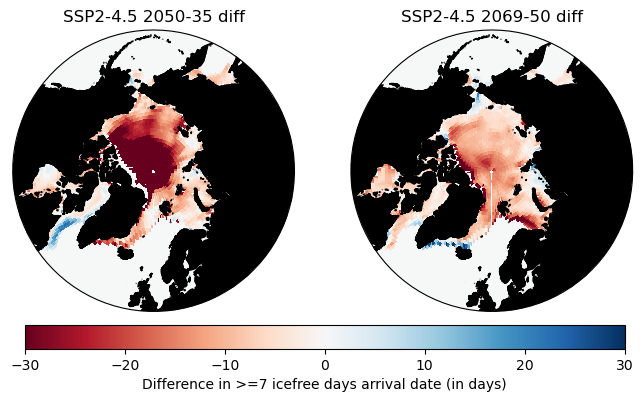

In [7]:
fig = plt.figure(figsize =(8, 4))
cols = 2; rows =1 
vmins = -30
vmaxs = 30
dailyfracdictPRAC = {}
dailyfracdictPRAC[0] = SSP2050 - SSP2035
dailyfracdictPRAC[1] = SSP2069 - SSP2050


namedailyfracPRAC = {}
namedailyfracPRAC[0] = ('SSP2-4.5 2050-35 diff')
namedailyfracPRAC[1] = ('SSP2-4.5 2069-50 diff')


for i in range(1, cols*rows+1):
    if np.nanmin(dailyfracdictPRAC[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues_r'
    norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, dailyfracdictPRAC[i-1], latIce, lonIce, norm, i, mycmap, namedailyfracPRAC[i-1])
cbar_ax = fig.add_axes([0.14, 0.05, 0.75, 0.06])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal')
cbar.set_label('Difference in >=7 icefree days arrival date (in days)', fontsize = 10)

In [8]:
ARISE2035[np.isnan(ARISE2035)] = 300
ARISE2050[np.isnan(ARISE2050)] = 300
ARISE2069[np.isnan(ARISE2069)] = 300
ARISE2035


array([[300., 300., 300., ..., 300.,   0.,   0.],
       [300., 300., 300., ..., 300., 300., 300.],
       [300., 300.,   0., ..., 300., 300., 300.],
       ...,
       [300., 300., 300., ..., 300., 300., 300.],
       [300., 300., 300., ..., 300., 300., 300.],
       [300., 300., 300., ..., 300., 300., 300.]])

In [9]:
# # finding where it was ice
# def just_ice(yeardata, iceplaces):
#     np.where(yeardata=300, yeardata)
#     iceplaces = yeardata
#     return iceplaces

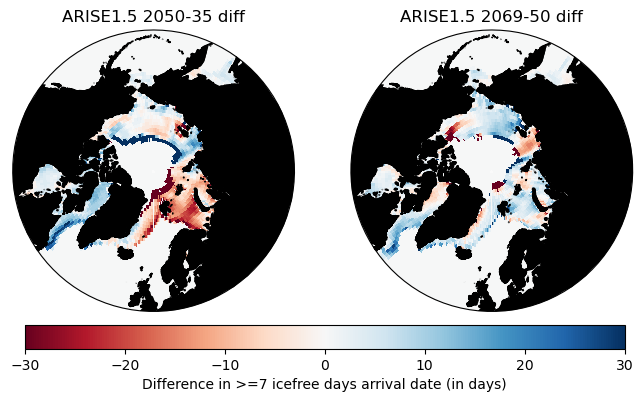

In [10]:
fig = plt.figure(figsize =(8, 4))
cols = 2; rows =1 
vmins = -30
vmaxs = 30
dailyfracdictPRAC = {}
dailyfracdictPRAC[0] = ARISE2050 - ARISE2035
dailyfracdictPRAC[1] = ARISE2069 - ARISE2050

# fracdict1[2] = iceAreaFEEDBACKMeanDiff
namedailyfracPRAC = {}
namedailyfracPRAC[0] = ('ARISE1.5 2050-35 diff')
namedailyfracPRAC[1] = ('ARISE1.5 2069-50 diff')

# namefracARISE[2] = ('ARISE icefrac difference')
for i in range(1, cols*rows+1):
    # if i <= 0:
    #     mycmap = 'pink'
    # elif i >= 0:
    #     mycmap = 'hot'
    # else:
    #     mycmap = 'RdBu'
    if np.nanmin(dailyfracdictPRAC[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues_r'
    # if vmins < 0. and vmaxs > 0.:
    norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    # else:
        # norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, dailyfracdictPRAC[i-1], latIce, lonIce, norm, i, mycmap, namedailyfracPRAC[i-1])
cbar_ax = fig.add_axes([0.14, 0.05, 0.75, 0.06])
cbar = plt.colorbar(cf1, cax=cbar_ax,orientation = 'horizontal')
cbar.set_label('Difference in >=7 icefree days arrival date (in days)', fontsize = 10)

### Getting a shapefile with Arctic Sea routes:

In [11]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install fiona

Note: you may need to restart the kernel to use updated packages.


In [34]:
import geopandas as gpd
import fiona
from fiona import Feature, Geometry
from shapely.geometry import mapping, shape
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
fname = r'/Users/dpathak/Desktop/REU/data/Shipping_and_Hydrography/Arctic_Sea_Routes.shp'

In [41]:
shapes = gpd.read_file(fname)

In [36]:
shapes.head(3)

,OBJECTID,Id,Name,Shape_Leng,SHAPE_Le_1,geometry
0,1,0,Northwest Passage,7689.630315,7.689630e+06,"LINESTRING (-678650.897 3437890.661, -675978.4..."
1,2,0,Northern Sea Route,7576.681873,7.576682e+06,"LINESTRING (-309853.580 3098535.804, -399597.4..."
2,3,0,Transpolar,7137.175384,7.137175e+06,"LINESTRING (-601749.314 3339545.402, -617264.0..."


<Axes: >

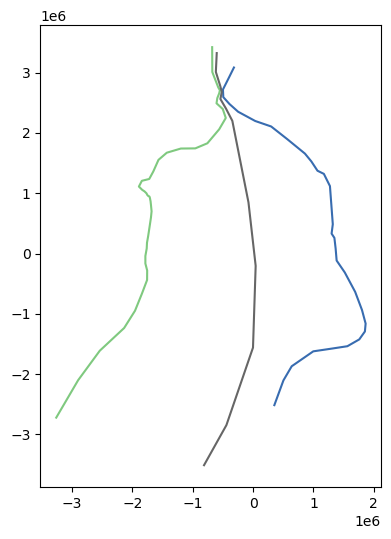

In [37]:
shippingRoutes = shapes.loc[:, 'geometry']
fig,ax = plt.subplots(figsize=(8,6))
shippingRoutes.plot(ax=ax, cmap='Accent')

In [31]:
type(shippingRoutes)
type(np.array(shippingRoutes))

numpy.ndarray

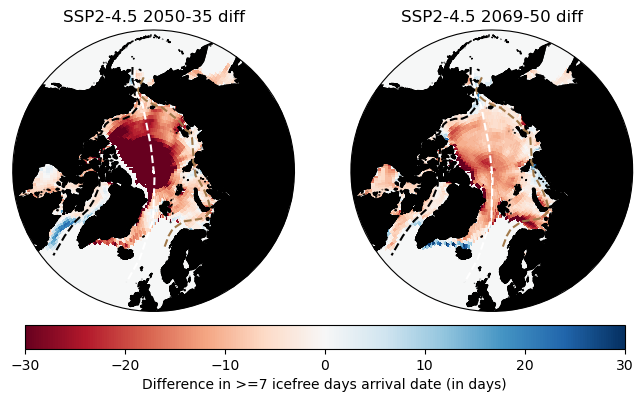

In [183]:
fig = plt.figure(figsize =(8, 4))
cols = 2; rows =1 
vmins = -30
vmaxs = 30
dailyfracdictPRAC = {}
dailyfracdictPRAC[0] = SSP2050 - SSP2035
dailyfracdictPRAC[1] = SSP2069 - SSP2050


namedailyfracPRAC = {}
namedailyfracPRAC[0] = ('SSP2-4.5 2050-35 diff')
namedailyfracPRAC[1] = ('SSP2-4.5 2069-50 diff')


for i in range(1, cols*rows+1):
    if np.nanmin(dailyfracdictPRAC[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues_r'
    norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, dailyfracdictPRAC[i-1], latIce, lonIce, norm, i, mycmap, namedailyfracPRAC[i-1])
    shippingRoutes.plot(ax=ax, cmap='cubehelix', linestyle='--')
cbar_ax = fig.add_axes([0.14, 0.05, 0.75, 0.06])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal')
cbar.set_label('Difference in >=7 icefree days arrival date (in days)', fontsize = 10)

# print(type(shippingRoutes))

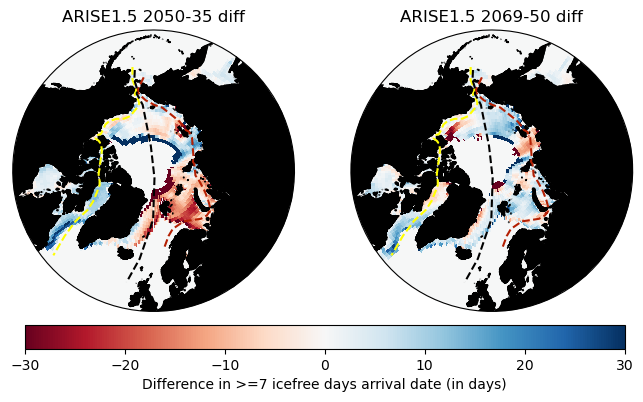

In [187]:
fig = plt.figure(figsize =(8, 4))
cols = 2; rows =1 
vmins = -30
vmaxs = 30
dailyfracdictPRAC = {}
dailyfracdictPRAC[0] = ARISE2050 - ARISE2035
dailyfracdictPRAC[1] = ARISE2069 - ARISE2050

# fracdict1[2] = iceAreaFEEDBACKMeanDiff
namedailyfracPRAC = {}
namedailyfracPRAC[0] = ('ARISE1.5 2050-35 diff')
namedailyfracPRAC[1] = ('ARISE1.5 2069-50 diff')

# namefracARISE[2] = ('ARISE icefrac difference')
for i in range(1, cols*rows+1):
    if np.nanmin(dailyfracdictPRAC[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues_r'
    norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, dailyfracdictPRAC[i-1], latIce, lonIce, norm, i, mycmap, namedailyfracPRAC[i-1])
    shippingRoutes.plot(ax=ax, cmap='gnuplot_r', linestyle='--')
cbar_ax = fig.add_axes([0.14, 0.05, 0.75, 0.06])
cbar = plt.colorbar(cf1, cax=cbar_ax,orientation = 'horizontal')
cbar.set_label('Difference in >=7 icefree days arrival date (in days)', fontsize = 10)